In [1]:
from src.get_modelnet40.load_data import get_ds_for_viz
from src.it_net.it_net import ITNet
import torch

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
from src.pretrain_utils.transforms import quaternion_to_matrix, apply_tfm, compose_tfms
from src.pretrain_utils.corruptions import tfm_from_rand_pose, create_random_transform

In [3]:
device = "mps"
batch_size = 64

In [4]:
checkpoint = torch.load("results/it_net2/checkpoint.pth")

model = ITNet(channel=3, num_iters=5).to(device)
model.load_state_dict(checkpoint["model"])
model = model.eval()

In [434]:
train_loader, val_loader, test_loader = get_ds_for_viz(batch_size)
batch = next(iter(train_loader))

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x16e0044c0>
Traceback (most recent call last):
  File "/Users/meharsingh/anaconda3/envs/rigid/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/Users/meharsingh/anaconda3/envs/rigid/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1443, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/Users/meharsingh/anaconda3/envs/rigid/lib/python3.9/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/Users/meharsingh/anaconda3/envs/rigid/lib/python3.9/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/Users/meharsingh/anaconda3/envs/rigid/lib/python3.9/multiprocessing/connection.py", line 936, in wait
    ready = selector.select(timeout)
  File "/Users/meharsingh/anaconda3/envs/rigid/lib/python3.9/selectors.py", line 4

In [755]:
batch_point_clouds = batch["pointcloud"].to(torch.float32).to(device)
batch_point_clouds = batch_point_clouds.transpose(1, 2)

In [914]:
index = 22
category = batch["category"][index].item()
print(f"Category: {category}")

Category: 16


## View 1

In [915]:
tfm = create_random_transform(batch_size, 30, 0, batch_point_clouds.dtype).to(batch_point_clouds.device)
view_1 = apply_tfm(batch_point_clouds, tfm)
view_1.shape

# view_1 = batch_point_clouds.float()
# view_1.shape

torch.Size([64, 3, 1024])

In [916]:
x = view_1[index,0,:].cpu().numpy()
y = view_1[index,1,:].cpu().numpy()
z = view_1[index,2,:].cpu().numpy()

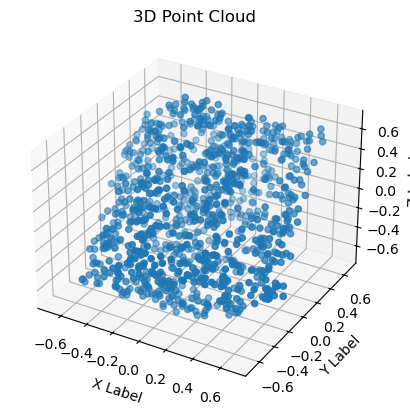

In [917]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Point Cloud')

ax.set_xlim(-0.75, 0.75)
ax.set_ylim(-0.75, 0.75)
ax.set_zlim(-0.75, 0.75)

plt.show()

## View 1 - Post

In [918]:
view_1_post, _, _ = model(view_1)
view_1_post.shape

torch.Size([64, 3, 1024])

In [919]:
x = view_1_post[index,0,:].detach().cpu().numpy()
y = view_1_post[index,1,:].detach().cpu().numpy()
z = view_1_post[index,2,:].detach().cpu().numpy()

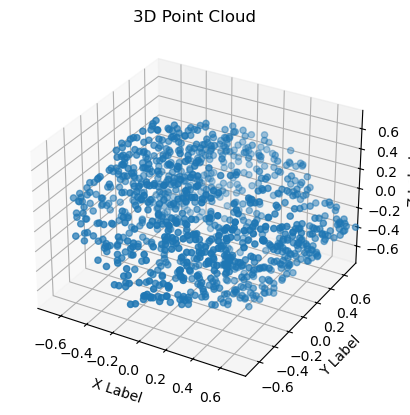

In [920]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Point Cloud')

ax.set_xlim(-0.75, 0.75)
ax.set_ylim(-0.75, 0.75)
ax.set_zlim(-0.75, 0.75)

plt.show()

## View 2

In [921]:
tfm = create_random_transform(batch_size, 30, 0, view_1.dtype).to(view_1.device)
view_2 = apply_tfm(view_1, tfm)
view_2.shape

torch.Size([64, 3, 1024])

In [922]:
x = view_2[index,0,:].cpu().numpy()
y = view_2[index,1,:].cpu().numpy()
z = view_2[index,2,:].cpu().numpy()

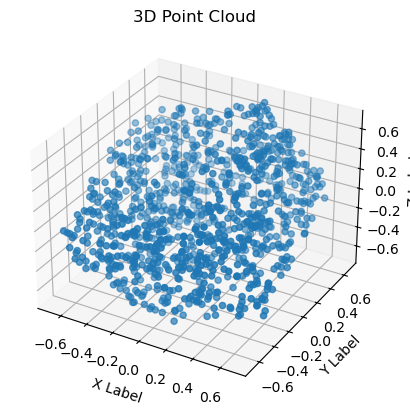

In [923]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Point Cloud')

ax.set_xlim(-0.75, 0.75)
ax.set_ylim(-0.75, 0.75)
ax.set_zlim(-0.75, 0.75)

plt.show()

## View 2 - Post

In [924]:
view_2_post, _, _ = model(view_2)
view_2_post.shape

torch.Size([64, 3, 1024])

In [925]:
x = view_2_post[index,0,:].detach().cpu().numpy()
y = view_2_post[index,1,:].detach().cpu().numpy()
z = view_2_post[index,2,:].detach().cpu().numpy()

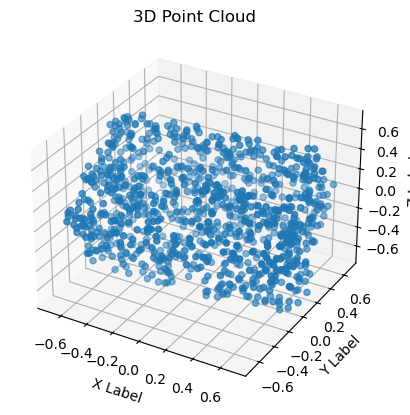

In [926]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Point Cloud')

ax.set_xlim(-0.75, 0.75)
ax.set_ylim(-0.75, 0.75)
ax.set_zlim(-0.75, 0.75)

plt.show()

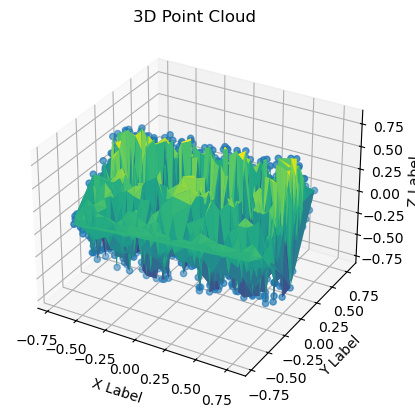

In [927]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Convert points to mesh
triangles = ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')

# Set all axes to the same amount
max_value = max(np.max(x), np.max(y), np.max(z))
min_value = min(np.min(x), np.min(y), np.min(z))
ax.set_xlim(min_value, max_value)
ax.set_ylim(min_value, max_value)
ax.set_zlim(min_value, max_value)

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Point Cloud')

plt.show()

In [928]:
import pyvista as pv

# points is a 3D numpy array (n_points, 3) coordinates of a sphere
cloud = pv.PolyData(points)
cloud.plot()

volume = cloud.delaunay_3d(alpha=2.)
shell = volume.extract_geometry()
shell.plot()

ModuleNotFoundError: No module named 'pyvista'

## Difference

In [874]:
class PLoss(torch.nn.Module):
    def __init__(self):
        super(PLoss, self).__init__()

    def forward(self, pc1, pc2):
        pointwise_distance = torch.sum((pc1 - pc2)**2, dim=1) # BxN
        pc_mean_distance = torch.mean(pointwise_distance, dim=1) # B
        loss = torch.mean(pc_mean_distance)
        return loss

In [875]:
ploss = PLoss()

v1_v2_diff = ploss(view_1, view_2)
print(f"Difference between View 1 & View 2: {v1_v2_diff.item()}")

v1_v2_diff_post = ploss(view_1_post, view_2_post)
print(f"Post, Difference between View 1 & View 2: {v1_v2_diff_post.item()}")

Difference between View 1 & View 2: 0.8984624147415161
Post, Difference between View 1 & View 2: 0.5496582984924316
